# Homework: Event detection
Group: 3 GOLDEN EYE tai joku kiva nimi  
Author: Jani Koskinen, Juho Nykänen  
Date: 2.11. 2022, 24.11.2022

See following notebooks for more information:
* Analyzing ET data 1 & 2

Scroll down to see the task description


## Load prerequisites

Import some required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Python\Python38\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Load eye tracking data from the Jenga experiment. If you are running this locally, comment out/remove the !wget line and change to path to the pd.read_csv function (if you only exctracted the zip, the file should be in 'data/jenga-clip-data.csv').


In [2]:
# !wget 'https://raw.githubusercontent.com/jpkos/ET_UEF/main/data/jenga-clip-data.csv'
# Change path if running locally e.g. with jupyterlab
df = pd.read_csv(
    'https://raw.githubusercontent.com/jpkos/ET_UEF/main/data/jenga-clip-data.csv')
df_et = df[df['Sensor'] == 'Eye Tracker'].reset_index(
    drop=True)  # Leave only Eye tracker data

df_et.head()


,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Gyro X,Gyro Y,Gyro Z,Accelerometer X,Accelerometer Y,Accelerometer Z
0,1109375,212014414,Eye Tracker,Jenga-project,23.6.2022,T1,Recording001,1/1/2000,1/1/2000,2:19:16 AM,...,440,5,953.0,518.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1119370,212024409,Eye Tracker,Jenga-project,23.6.2022,T1,Recording001,1/1/2000,1/1/2000,2:19:16 AM,...,440,5,953.0,518.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1129363,212034402,Eye Tracker,Jenga-project,23.6.2022,T1,Recording001,1/1/2000,1/1/2000,2:19:16 AM,...,440,5,953.0,518.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1139349,212044388,Eye Tracker,Jenga-project,23.6.2022,T1,Recording001,1/1/2000,1/1/2000,2:19:16 AM,...,440,5,953.0,518.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1149345,212054384,Eye Tracker,Jenga-project,23.6.2022,T1,Recording001,1/1/2000,1/1/2000,2:19:16 AM,...,440,5,953.0,518.0,NaN,NaN,NaN,NaN,NaN,NaN


# Detecting fixations

In the previous notebooks we saw that it was easy to visually distinguish the two main gaze-related events, fixations and saccades. When the gaze location is "jittering" around a small area, it's a fixation, and when gaze makes a sudden, larger jump, it's a saccade. To detect these events automatically, we might think of doing something like this:

```
events_list = []
for each gaze_point in data:
  if (distance between current gaze_point and previous gaze_point) < threshold:
    add 'fixation' to events_list
  else:
    add 'saccade' to events_list
```

In fact, many of the traditional algorithms for detecting gaze events are not that far from this simple idea.

## **Homework**: Implement your algorithm

In this homework, your task is to study, explore, and compare the event-filtering algorithms. In the task, you select one algorithm, implement it yourself, and apply it in the group project. In this notebook, you can compare how your implementation scored against the proprietary implementation - Tobii Glasses 2 eye tracker's own fixation detection method. Don't despair! The goal is not to create a perfect filtering algorithm but to learn principles of filtering in eye-tracking research.

**Task 1.** Write the pseudocode of your algorithm below in the first (empty) code block.

# Task 1. Your Pseudocode of your algorithm here
## ID-T
```
While there are points  

    Initialize window over first points until current time > start time + min duration

    If dispersion <= threshold  

        Add points to window until dispersion > threshold  

        Save the centroids of the points

        Remove window points from points  

    Else  

        Remove first point from points 

return fixation points
```

**Task 2.** Then, edit the function in the next code block so that it takes the x- and y-coordinates of the gaze, applies your fixation detection algorithm and outputs a list where each element is either 'Fixation' or 'Saccade'. The list should have the same length as the original eye tracker dataset, 1946.

The gaze locations are in the et_df dataframe under column names 'Gaze point X', 'Gaze point 'Y. One row corresponds to one measured gaze point.

Implement your algorithm in the code block. As an example, the function shows an implementation of the simple algorithm, feel free to test it with different threshold values. Replace lines 3 - 5 with you own code.

In [3]:
def get_dispersion(x, y):
    """Calculate dispersion somehow, idea from: https://github.com/ecekt/eyegaze

    Args:
        x (numpy array): x coordinates
        y (numpy array): y coordinates

    Returns:
        float: amount of dispersion
    """
    x = np.array(x)
    y = np.array(y)

    argxmin = np.min(x.astype(float))
    argxmax = np.max(x.astype(float))

    argymin = np.min(y.astype(float))
    argymax = np.max(y.astype(float))

    return ((argxmax - argxmin) + (argymax - argymin))/2


In [4]:
def our_idt(x, y, t, max_disp=10, min_dur=50000):
    # helper variables
    fixations = []
    i = 0
    last = 0

    # loop points
    while(i < len(x)):

        # reset variables
        dispersion = 0.0
        window = []

        # add first timepoint
        window.append(t[last])

        last_time = t[last]
        start_time = last_time
        last = last + 1

        y_fixations = []
        x_fixations = []

        # Initialize window over first points to cover the duration threshold
        while((start_time + min_dur) >= last_time and last + 1 < len(x)):
            x_fixations.append(x[last])
            y_fixations.append(y[last])

            last = last + 1
            last_time = t[last]

        # If dispersion of window points <= threshold  
        if len(x_fixations) > 0 and get_dispersion(x_fixations, y_fixations) <= max_disp:

            # Add additional points to the window until dispersion > threshold  
            while (dispersion <= max_disp and last + 1 < len(x)):
                x_fixations.append(x[last])
                y_fixations.append(y[last])

                dispersion = get_dispersion(x_fixations, y_fixations)

                last = last + 1
                last_time = t[last]

            # add window to the fixations :D
            window.append(last_time)
            fixations.append(window)

            # Remove window points from points  
            i = last
        else:
            #print("dispersion liikaa lol", last, i)
            # Remove first point from points 
            i = i + 1

    # return fixation points
    return fixations


In [5]:
# Task 2.
fixations = our_idt(list(df_et['Gaze point X']), list(df_et['Gaze point Y']), list(df_et['Computer timestamp']), 7, 50000)

fixation_timepoints = []

for fixation_period in fixations:
    asd = df_et[df_et['Computer timestamp'].between(fixation_period[0], fixation_period[1])]
    for val in asd['Computer timestamp'].values:
        fixation_timepoints.append(val)

fixation_timepoints = np.array(fixation_timepoints).ravel()

mask = (df_et['Computer timestamp'].isin(fixation_timepoints))

**Task 3.** Plot your results and compare with Tobii's own results

Run the below code to generate two side by side plots with fixations shown in green and saccades in red. Please note that your objective is not to exactly replicate the Tobii IV-T results with your algorithm, there will always be differences in how two algorithms can detect the gaze events.

Text(0.5, 1.0, 'Our algorithm')

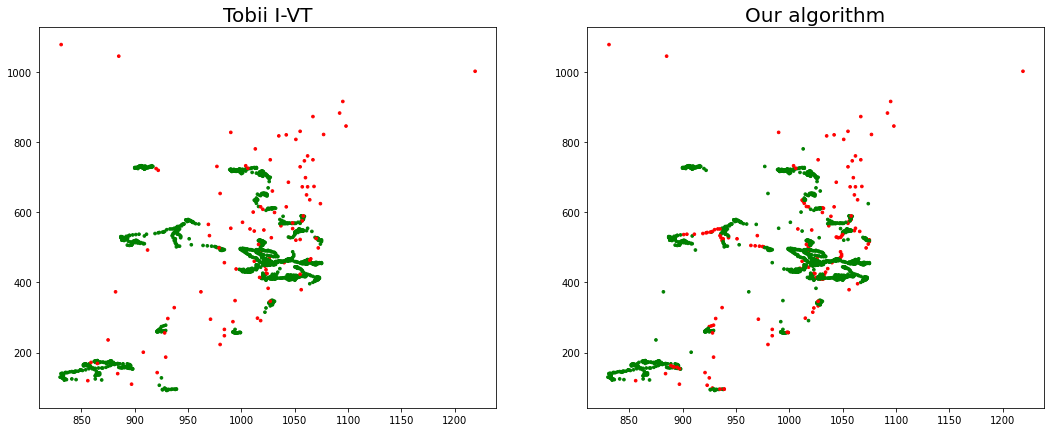

In [6]:
# Task 3. Plot your results and explore your results
original_colors = ['green' if x == 'Fixation' else 'red' for x in df_et['Eye movement type']]
our_colors = ['green' if x else 'red' for x in mask]

fig, ax = plt.subplots(ncols=2, figsize=(18,7))
ax[0].scatter(df_et['Gaze point X'], df_et['Gaze point Y'], color=original_colors, s=7)
ax[1].scatter(df_et['Gaze point X'], df_et['Gaze point Y'], color=our_colors, s=7)
ax[0].set_title('Tobii I-VT', fontdict={'fontsize':20})
ax[1].set_title('Our algorithm', fontdict={'fontsize':20})

**Task 4.** After testing the results with different threshold values and parameters, discuss in your group and write down your answers to following questions:
1. How different threshold values affect detection results?  
**Answer**: When we increse the max distance -treshold, more of the saccades are being collected to fixations, and when lowering the min duration same event happens. There might be a few bugs in the code above, but with correct parameters it seems to work surprisingly well :D (actually surprised by the result after coding). Also, I am not completely sure if I followed the pseudo code 100% (for instance, the centroids are not yet collected but it could be added quite simply).

2. Where did your and the Tobii's algorithm results differ the most?  
**Answer**: The algorithm differs the most with single points which seem to be saccades, but it detects them as fixations.

3. What are the implications of points 1. and 2. on designing and conducting experiments?  
**Answer**: It is really important to tweak parameters regarding the device used and the quality of data (?). 

**After you are done, export this notebook as pdf showing your pseudocode, algorithm implementation and at least one plot comparing the results from Tobii with your results. You can add more plots with different parameter values if you want.**